<div style="margin-top:120px;">
    <h1 style="text-align:center;">Human Resources Analytics Part 2: Combination of Principal Component Analysis with SMOTE resampling </h1>
</div>

<div style="width:100%; margin-top:30px;">
    <p style="text-align:center;">William Walter da Silva</p>
</div>

### Abstract

In the previous article was applied the descripitives analysis to explore the dataset and validade assumptions about why the employees left the company. 

Now, we will use the combination of dimensionality reduction and resampling methods. In the first step PCA is applied Human Resources dataset to eliminate irrelevant variables and in the second step SMOTE resampling is carried out to balance the class distribution and increase the variety of sample domain.


## 1. The Human Resources Dataset

   The Human Resources Analytics is a simulated dataset from <a href="https://www.kaggle.com/ludobenistant/hr-analytics">Kaggle</a> and the focus is to understand why the best and most experienced employees is leaving the company.
   By the exploration of this data set its possible to extract good insights of a problems that the Human Resource department deals daily.
   In many industries retain their best employees its a question of long term strategy, and can impact the companies growth or put in financial risk, mainly if the employees leave to work at the competitor.

To start the step of preprossing the dataset is neccessary to import some useful Python libraries.
   
* Numpy: Is a fundamental package to use linear algebra and random number capabilities.
  See: www.numpy.org/

* Pandas: Is a package to work with relacional data as tables.
  See: pandas.pydata.org/

In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Load the data

To load the dataset we use a Pandas method called **read_csv** that read CSV(comma-separated) files and covert into DataFrame.

In [80]:
data = pd.read_csv('HR_comma_sep.csv')

#### Drop categorical variables

The variables **sales, balance and salary** are removed because there will be no gains to standardize
categorical variables.

Just to remember in the part 1: Descriptive Analysis the variable *sales* was renamed to *department*.
If you are starting from this article, use **sales** instead of **department**

In [81]:
data_drop = data.drop(labels = ['sales', 'left', 'salary'], axis =1)

columns = data_drop.columns

data_drop.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,0.38,0.53,2,157,3,0,0
1,0.80,0.86,5,262,6,0,0
2,0.11,0.88,7,272,4,0,0
3,0.72,0.87,5,223,5,0,0
4,0.37,0.52,2,159,3,0,0


## 2. Principal Component Analysis (PCA)

Principal component analysis is a method of extracting important variables(in form of components) and identifying patterns from large set of variables in the data set. With the similarities and differences found in the high dimension of the data set, PCA compress the data, by reducing the number of dimensions without much loss of information. With fewer variables the visualization becomes more meaningful.

There are some steps to correct implement PCA:
    * Step 1: Standarize the data
    * Step 2: Calculate the covariance matrix
    * Step 3: Calculate the eigenvalues and eigenvectors
    * Step 4: Sorting the eigenvectors
    * Step 5. Explained Variance
    * Step 6: Projection Matrix
    * Step 7: New Feature Space

### Step 1. Data Standarization

Standardization of a dataset is a common requirement for many machine learning algorithms, which involves rescaling the variables that has input values in differing scales, such that they have the properties of a standard normal distribution with a mean of zero and a standard deviation of one. 

Without the data standarization many machine learnings algorithms might behave badly.

* A value is standardized as follows:

\begin{equation*}
\frac{x - mean(x)}{std(x)}
\end{equation*}

* Where the mean is calculated as:

\begin{equation*}
\frac{sum(x)}{count(x)}
\end{equation*}

* And the population standard deviation is calculated as:

\begin{equation*}
\frac{sqrt(sum( (x - mean)^2 )}{count(x))}
\end{equation*}

#### Scale the data

To standardize the dataset, it is used the scikit-learn object **StandardScaler**.

In [82]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

data_std = std.fit_transform(data_drop)

All variables are now on the same scale relative to one another.

In [83]:
scaled_df = pd.DataFrame(data_std, columns=columns)

scaled_df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,-0.936495,-1.087275,-1.462863,-0.882040,-0.341235,-0.411165,-0.147412
1,0.752814,0.840707,0.971113,1.220423,1.713436,-0.411165,-0.147412
2,-2.022479,0.957554,2.593763,1.420657,0.343655,-0.411165,-0.147412
3,0.431041,0.899131,0.971113,0.439508,1.028546,-0.411165,-0.147412
4,-0.976716,-1.145699,-1.462863,-0.841993,-0.341235,-0.411165,-0.147412


#### Plot standardize variables

With the **kernel density estimation plot** is possible to visualize that the variables share the same scale. 

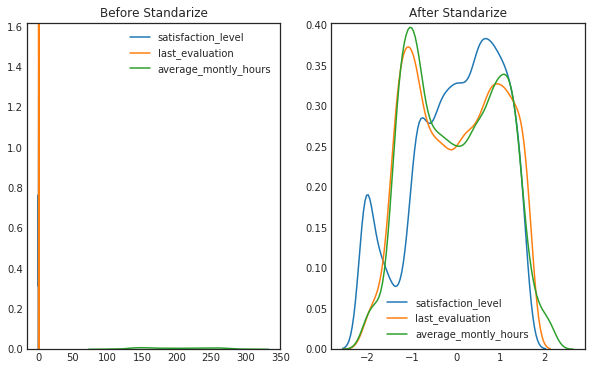

In [84]:
sns.set_style('white')
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 6))

ax1.set_title('Before Standarize')
ax = sns.kdeplot(data['satisfaction_level'], ax = ax1)
ax = sns.kdeplot(data['last_evaluation'], ax = ax1)
#ax = sns.kdeplot(data['number_project'], ax = ax1)
ax = sns.kdeplot(data['average_montly_hours'], ax = ax1)
#ax = sns.kdeplot(data['time_spend_company'], ax = ax1)
#ax = sns.kdeplot(data['Work_accident'], ax = ax1)
#ax = sns.kdeplot(data['promotion_last_5years'], ax = ax1)


ax2.set_title('After Standarize')
ax = sns.kdeplot(scaled_df['satisfaction_level'], ax = ax2)
ax = sns.kdeplot(scaled_df['last_evaluation'], ax = ax2)
#ax = sns.kdeplot(scaled_df['number_project'], ax = ax2)
ax = sns.kdeplot(scaled_df['average_montly_hours'], ax = ax2)
#ax = sns.kdeplot(scaled_df['time_spend_company'], ax = ax2)
#ax = sns.kdeplot(scaled_df['Work_accident'], ax = ax2)
#ax = sns.kdeplot(scaled_df['promotion_last_5years'], ax = ax2)



### Step 2: Calculate the covariance matrix

The approach to PCA is to perform the eigendecomposition on the covariance matrix, which is a **d x d matrix** where each element represents the covariance between two variables. Covariance is a measure to find out how much the dimensions vary from the mean with respectrespect to each other.

In [85]:
mean_vec = np.mean(data_std, axis=0)
cov_mat = (data_std - mean_vec).T.dot((data_std - mean_vec)) / (data_std.shape[0]-1)
print('Covariance matrix: \n%s' %cov_mat)

Covariance matrix: 
[[ 1.00006668  0.10502822 -0.14297912 -0.02004945 -0.1008728   0.05870115
   0.02560689]
 [ 0.10502822  1.00006668  0.34935588  0.33976445  0.1315995  -0.00710476
  -0.00868435]
 [-0.14297912  0.34935588  1.00006668  0.41723845  0.19679901 -0.00474086
  -0.00606436]
 [-0.02004945  0.33976445  0.41723845  1.00006668  0.12776343 -0.01014356
  -0.00354465]
 [-0.1008728   0.1315995   0.19679901  0.12776343  1.00006668  0.00212056
   0.06743742]
 [ 0.05870115 -0.00710476 -0.00474086 -0.01014356  0.00212056  1.00006668
   0.03924805]
 [ 0.02560689 -0.00868435 -0.00606436 -0.00354465  0.06743742  0.03924805
   1.00006668]]


**Equivalently, is possible to use the numpy cov function:**

In [86]:
print('NumPy covariance matrix: \n%s' %np.cov(data_std.T))

NumPy covariance matrix: 
[[ 1.00006668  0.10502822 -0.14297912 -0.02004945 -0.1008728   0.05870115
   0.02560689]
 [ 0.10502822  1.00006668  0.34935588  0.33976445  0.1315995  -0.00710476
  -0.00868435]
 [-0.14297912  0.34935588  1.00006668  0.41723845  0.19679901 -0.00474086
  -0.00606436]
 [-0.02004945  0.33976445  0.41723845  1.00006668  0.12776343 -0.01014356
  -0.00354465]
 [-0.1008728   0.1315995   0.19679901  0.12776343  1.00006668  0.00212056
   0.06743742]
 [ 0.05870115 -0.00710476 -0.00474086 -0.01014356  0.00212056  1.00006668
   0.03924805]
 [ 0.02560689 -0.00868435 -0.00606436 -0.00354465  0.06743742  0.03924805
   1.00006668]]


### Step 3. Eigendecomposition - Computing Eigenvectors and Eigenvalues

The eigenvectors and eigenvalues of a covariance (or correlation) matrix represent the “core” of a PCA: The eigenvectors (principal components) determine the directions of the new feature space, and the eigenvalues determine their magnitude. The eigenvalues explain the variance of the data along the new feature axes.

In order to decide which eigenvector(s) can dropped without losing too much information for the construction of lower-dimensional subspace, we need to inspect the corresponding eigenvalues: The eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data, those are the ones can be dropped.

In [87]:
numpy_cov_mat = np.cov(data_std.T)

eig_vals, eig_vecs = np.linalg.eig(numpy_cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.08797699 -0.29189921  0.27784886  0.33637135  0.79752505  0.26786864
  -0.09438973]
 [ 0.50695734  0.30996609 -0.70780994  0.07393548  0.33180877  0.1101505
  -0.13499526]
 [ 0.5788351  -0.77736008 -0.00657105 -0.19677589 -0.10338032 -0.10336241
  -0.02293518]
 [ 0.54901653  0.45787675  0.63497294 -0.25170987  0.10388959 -0.01034922
  -0.10714981]
 [ 0.31354922  0.05287224  0.12200054  0.78782241 -0.28404472  0.04036861
   0.42547869]
 [-0.01930249  0.04433104 -0.03622859 -0.05762997  0.37489883 -0.8048393
   0.45245222]
 [ 0.00996933  0.00391698 -0.04873036 -0.39411153  0.10557298  0.50589173
   0.75836313]]

Eigenvalues 
[ 1.83017431  0.54823098  0.63363587  0.84548166  1.12659606  0.95598647
  1.06036136]


### Step 4. Sorting the eigenvectors by decreasing eigenvalues

The eigenvectors only define the directions of the new axis, since they have all the same unit length 1, however with the corresponding eingenvalues is possible to choose which eigenvector that has the lowest information about the distribuition of the data to drop.

In [88]:
# Make a list of (eigenvalue, eigenvector)
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

eig_pairs

# Eigenvectors sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
1.83017431388
1.12659606399
1.06036136228
0.955986474007
0.845481663714
0.633635874483
0.548230976542


### Step 5. Explained Variance

Explained Variance is a measure calculated from eigenvalues that tells us how much information (variance) can be attributed to each of the principal components.

The plot below shows that:
* Maximum variance around 26% can be explained by the first principal component alone. 
* The second,third,fourth and fifth principal component share almost equal amount of information.
* 6th and 7th components share less amount of information as compared to the rest of the Principal components.
* Almost 90% variance by the first 6 components. 
* The last component has less than 8% of the variance and will be dropped.

In [89]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
var_exp

[26.143604201713206,
 16.093156465426492,
 15.147009525908103,
 13.656039104655909,
 12.07750420731645,
 9.0513375610720228,
 7.8313489339078126]

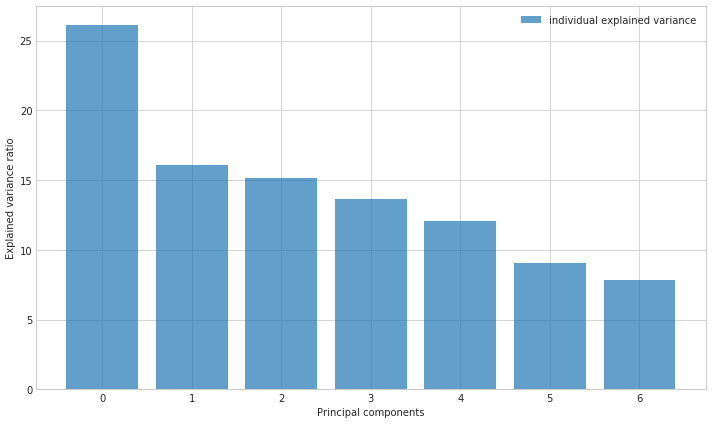

In [90]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10, 6))

    plt.bar(range(7), var_exp, alpha=0.7, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

### Step 6. Projection Matrix

The construction of the projection matrix that will be used to transform the **Human Resource Analytics data** onto the new feature subspace with the top eigenvectors.

In this case we are reducing the 7 dimensional variables to a 6 dimensional variables space by choosing the top 6 eigenvectors with the highest eigenvalues to construct the eigenvactor matrix.

In [91]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(7,1), 
                      eig_pairs[1][1].reshape(7,1),
                      eig_pairs[2][1].reshape(7,1),
                      eig_pairs[3][1].reshape(7,1),
                      eig_pairs[4][1].reshape(7,1),
                      eig_pairs[5][1].reshape(7,1)))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.08797699  0.79752505 -0.09438973  0.26786864  0.33637135  0.27784886]
 [ 0.50695734  0.33180877 -0.13499526  0.1101505   0.07393548 -0.70780994]
 [ 0.5788351  -0.10338032 -0.02293518 -0.10336241 -0.19677589 -0.00657105]
 [ 0.54901653  0.10388959 -0.10714981 -0.01034922 -0.25170987  0.63497294]
 [ 0.31354922 -0.28404472  0.42547869  0.04036861  0.78782241  0.12200054]
 [-0.01930249  0.37489883  0.45245222 -0.8048393  -0.05762997 -0.03622859]
 [ 0.00996933  0.10557298  0.75836313  0.50589173 -0.39411153 -0.04873036]]


### Step 7. New Feature Space

In this last step we will use the projection **matrix_W** to transform our samples onto the new subspace.

In [92]:
new_space = data_std.dot(matrix_w)
new_space

array([[-1.90035018, -1.12083103, -0.0797787 ,  0.03228437, -0.07256447,
        -0.06063013],
       [ 2.1358322 ,  0.2493369 ,  0.0936161 ,  0.50676925,  1.2487747 ,
         0.61378158],
       [ 3.05891625, -1.68312693, -0.301682  , -0.4488635 , -1.12495888,
        -0.29066929],
       ..., 
       [-2.0507165 , -1.182032  , -0.04594506,  0.02441143, -0.01553247,
        -0.24980658],
       [ 2.91418496, -1.42752606, -0.36333357, -0.31517759, -0.97107375,
        -0.51444624],
       [-1.91543672, -1.17021407, -0.07024077,  0.01486762, -0.09545357,
        -0.01773844]])

## 2.1. PCA with scikit-learn

After a step-by-step implementation of PCA, we'll see how to make it easy with scikit-learn.

### 2.1.1. Import the PCA library

In the plot below PCA explained variance ratio shows the same results that we achieved before.



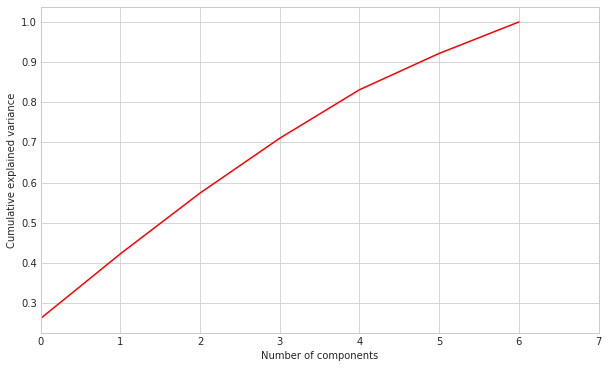

In [93]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10,6))


    from sklearn.decomposition import PCA
    pca = PCA()

    # Apply PCA model to Fit the standarized data
    pca.fit(data_std)

    plt.plot(np.cumsum(pca.explained_variance_ratio_), color='red')
    plt.xlim(0,7,1)
    plt.xlabel('Number of components')
    plt.ylabel('Cumulative explained variance');

###  2.1.2. Calculate the covariance matrix 

In [94]:
pca.get_covariance()

array([[ 1.        ,  0.10502121, -0.14296959, -0.02004811, -0.10086607,
         0.05869724,  0.02560519],
       [ 0.10502121,  1.        ,  0.34933259,  0.3397418 ,  0.13159072,
        -0.00710429, -0.00868377],
       [-0.14296959,  0.34933259,  1.        ,  0.41721063,  0.19678589,
        -0.00474055, -0.00606396],
       [-0.02004811,  0.3397418 ,  0.41721063,  1.        ,  0.12775491,
        -0.01014289, -0.00354441],
       [-0.10086607,  0.13159072,  0.19678589,  0.12775491,  1.        ,
         0.00212042,  0.06743293],
       [ 0.05869724, -0.00710429, -0.00474055, -0.01014289,  0.00212042,
         1.        ,  0.03924543],
       [ 0.02560519, -0.00868377, -0.00606396, -0.00354441,  0.06743293,
         0.03924543,  1.        ]])

### 2.1.3. PCA explained variance

In this plot we can confirm that the last component has less variance and we can drop it, in this case, without loosing much information.

In [95]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([ 0.26143604,  0.16093156,  0.1514701 ,  0.13656039,  0.12077504,
        0.09051338,  0.07831349])

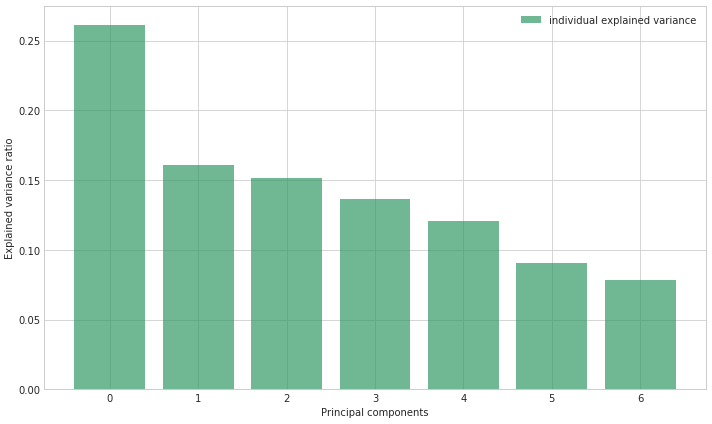

In [96]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10, 6))

    plt.bar(range(7), explained_variance, alpha=0.7, align='center',
            label='individual explained variance',  color="#339966")
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

### 2.1.4. scikit learn PCA Feature Space

Now that we choose the best 6 components, we will apply the new PCA model to the standardized data.

**data_std_new** will be used when the data will be split among train and test variables. 

In [97]:
best_pca = PCA(n_components=6)

data_std_new = best_pca.fit_transform(data_std)

print(data_std_new)

[[-1.90035018 -1.12083103 -0.0797787   0.03228437 -0.07256447  0.06063013]
 [ 2.1358322   0.2493369   0.0936161   0.50676925  1.2487747  -0.61378158]
 [ 3.05891625 -1.68312693 -0.301682   -0.4488635  -1.12495888  0.29066929]
 ..., 
 [-2.0507165  -1.182032   -0.04594506  0.02441143 -0.01553247  0.24980658]
 [ 2.91418496 -1.42752606 -0.36333357 -0.31517759 -0.97107375  0.51444624]
 [-1.91543672 -1.17021407 -0.07024077  0.01486762 -0.09545357  0.01773844]]


## 3. Problem with imbalanced data sets

The learning and the prediction phases of machine learning algorithms can be affected by the problem of imbalanced data. The balancing issue corresponds to the difference of the number of samples between the majority and minority  class. A data set can be considered imbalanced when the minority class is below 10%. But it's possible to find data set with smaller minority class.

### 3.1. Oversampling and Undersampling

There are some techniques used to deal with imbalanced datas:
* Oversampling: Randomly replicates minority instances to increase their population. The problem with duplicating the data is that it makes variables appear to have lower variance.
* Undersampling: Balance the data set by reducing the majority class. The problem it can lose the prediction power by removing some many observations. Due to data loss, the accuracy of the created model can significantly decrease.

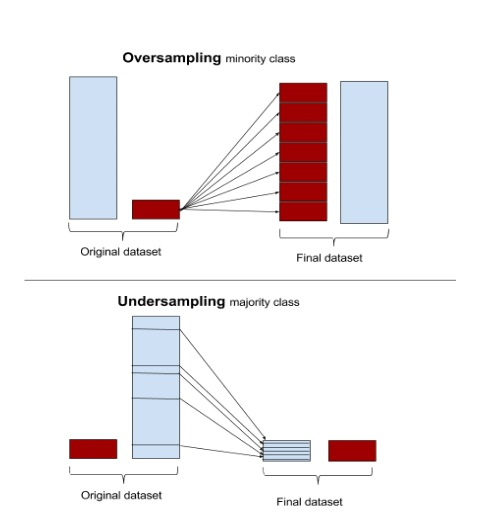

In [98]:
from IPython.display import Image
Image(filename='ImbalancedClasses.png', width=500, height=500)
# Image source: https://svds.com/learning-imbalanced-classes/
# oct 2017

## 4. SMOTE

SMOTE(Synthetic Minority Oversampling Technique):This technique create new minority class by the syntetic interpolation among existing class members. This creates a new set of observations that do not duplicate, which helps the model, increasing the accuracy and the ability to generalize.
There are 4 versions of the algorithms:
    * Regular Algorithm: Minority samples only.Does not impose any rule and will randomly pick-up all possible samples available.
Both 2 algorithms below are variation of Regular Algorithms with different criteria, distinguishing only data point in the edge between the majority and minority class. To determine where a data point in the edge will be used to criate another syntetic instances.
To improve accuracy and reduce misclassification
    * Borderline 1: Minority samples only
    * Borderline 2: Majority and Minority, repeat the same procedure as the Regular algorithm
    * SVM: uses an SVM classifier to find support vectors and generate samples considering them.

### 4.1. How SMOTE works

SMOTE creates synthetic observations of the minority class (**left == 1**) by:

    1 - Finding the k-nearest-neighbors for minority class observations (finding similar observations).
    2 - Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observation.

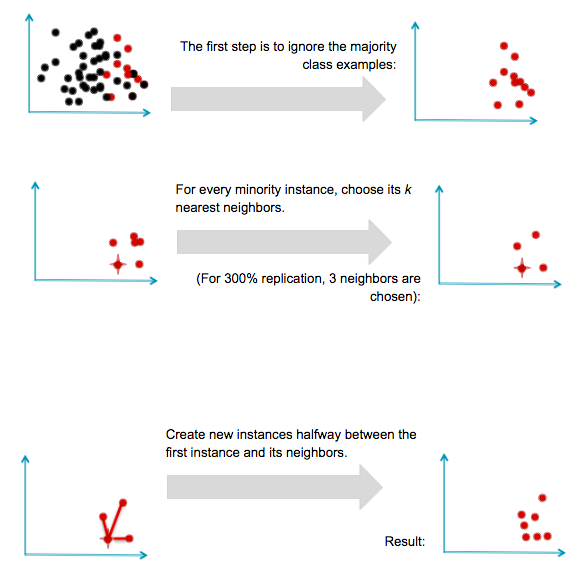

In [99]:
from IPython.display import Image
Image(filename = 'ImbalancedClasse_2.png')
# Image source: https://svds.com/learning-imbalanced-classes/
# oct 2017

## 5. Creating the Training and Test Sets

With the data prepared, we need to split the features in training and test dataset:
    * Training dataset to build and validate the model.
    * Test dataset as new data not seen to analyze the model in production.

In [100]:
#Spliting Training and Test Features

from sklearn.model_selection import train_test_split

training_features, test_features, \
training_target, test_target, = train_test_split(data_std_new,
                                               data['left'],
                                               test_size = .20,
                                               random_state=12)

In [101]:
print('Training Features:',training_features.shape)
print('Training Targets:',training_target.shape)
print('Test Features:',test_features.shape)
print('Test Targets:',test_target.shape)

Training Features: (11999, 6)
Training Targets: (11999,)
Test Features: (3000, 6)
Test Targets: (3000,)


Now we will split the **training_features** into **train and validation** set to build the models. 
    * 80% For Training
    * 20% For Validation

In [102]:
X_train, X_valid, Y_train, Y_valid = train_test_split(training_features, training_target,
                                                  test_size = .20,
                                                  random_state=12)

print('X_Train:', X_train.shape)
print('Y_Train:', Y_train.shape)
print('X_Valid:', X_valid.shape)
print('Y_Valid:', Y_valid.shape)

X_Train: (9599, 6)
Y_Train: (9599,)
X_Valid: (2400, 6)
Y_Valid: (2400,)


### 5.1. Applying SMOTE to the training data

We will apply the SMOTE to interpolate **only the training data**, none of the information in the validation data is being used to create synthetic observations. **So these results is generalizable**.

In [103]:
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE

In all the cases the minority class **left == 1** is interpoleted till achieve the same number of observations of **left == 0**.

In [126]:
sm = SMOTE(kind = 'borderline1', random_state=12, ratio = 'auto')

X_train_res, Y_train_res = sm.fit_sample(X_train, Y_train)

from sklearn.metrics import accuracy_score
print(pd.Series(Y_train).value_counts())
print(pd.Series(Y_train_res).value_counts())

0    7335
1    2264
Name: left, dtype: int64
1    7335
0    7335
dtype: int64


## 6. Logistic Regression

Logistic regression is the appropriate regression analysis to conduct when the dependent variable is binary and is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal or interval independent variables.

We will build a model with Logistic Regression before and after resampling the data with the SMOTE to compare how the model will perform in the **Validation and Test data**.

### 6.1 Logistic Regression Model without the SMOTE resampling

In [105]:
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression()
lreg.fit(X_train, Y_train) # data before interpolation
reg_pred = lreg.predict(X_valid)

print('How the model performs in the validation set?')
print('Accuracy:',lreg.score(X_valid, Y_valid))
print('Recall:',recall_score(Y_valid, lreg.predict(X_valid)))

print('\n')

print("Let's see how this model will perform with our unseen data.")
print('Accuracy:',lreg.score(test_features, test_target))
print('Recall:',recall_score(test_target, lreg.predict(test_features)))


How the model performs in the validation set?
Accuracy: 0.77
Recall: 0.246891651865


Let's see how this model will perform with our unseen data.
Accuracy: 0.754333333333
Recall: 0.239247311828


**75% accuracy in the unseen data looks good**, but overall accuracy is not an appropriate parameter for performance evaluation when the data is imbalanced and we need to know how well we can specifically classify employees that can leave the company. In statistics, this is called recall, and it’s the number of correctly predicted “positives” divided by the total number of “positives”. In the case of the Logistic Regression Model build without the interpolation of the minority class **the recall is around 24%**, in other words, this is the prediction power of the model.   

The nature of some problems require a high rate of correct detection in the minority class and allows for a small error rate in the majority class while simple overall accuracy is clearly not appropriate in such cases. The overall accuracy is biased over the majority class which contains more samples and this measure does not represent the minority class accuracy.

### 6.2 Confusion Matrix without SMOTE

Confusion matrix is usade to evaluate the quality of the output of a classifier on the data set. The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.

In [106]:
from sklearn.metrics import confusion_matrix, classification_report

conmat = np.array(confusion_matrix(test_target, lreg.predict(test_features)))
confusion_matrix = pd.DataFrame(conmat, index = ["Act_Not_left", "Act_left"], columns = ["Pred_not_left", "Pred_left"])

confusion_matrix

,Pred_not_left,Pred_left
Act_Not_left,2085,171
Act_left,566,178


### 6.3 Logistic Regression Model with the SMOTE resampling

In [127]:
lreg_res = LogisticRegression()
lreg_res.fit(X_train_res, Y_train_res) # data after interpolation

print('How the model performs in the validation set?')
print('Accuracy:',lreg_res.score(X_valid, Y_valid))
print('Recall:',recall_score(Y_valid, lreg_res.predict(X_valid)))

print('\n')

print("Let's see how this model will perform with our unseen data.")
print('Accuracy:',lreg_res.score(test_features, test_target))
print('Recall:',recall_score(test_target, lreg_res.predict(test_features)))


How the model performs in the validation set?
Accuracy: 0.737916666667
Recall: 0.804618117229


Let's see how this model will perform with our unseen data.
Accuracy: 0.730666666667
Recall: 0.817204301075


Now we can see whow the SMOTE resampling can help to improve the model. The recall for the unseen data achieved:

* Around 82% with the **borderline1 or borderline2**algorithms.
* 75% with the **regular** algorithm.
* 77% with the **svm** algorithm.

### 6.4 Confusion Matrix wilth SMOTE

In [128]:
from sklearn.metrics import confusion_matrix

conmat = np.array(confusion_matrix(test_target, lreg_res.predict(test_features)))
confusion_matrix = pd.DataFrame(conmat, index = ["Act_Not_left", "Act_left"], columns = ["Pred_not_left", "Pred_left"])

confusion_matrix

,Pred_not_left,Pred_left
Act_Not_left,1584,672
Act_left,136,608


The main goal for learning from imbalanced datasets is to
improve the recall without hurting the precision. However,
recall and precision goals can be often conflicting, since when
increasing the true positive for the minority class, the number
of false positives can also be increased; this will reduce the
precision.

## What we will do next?

From the results achieved, the best performance is obtained when PCA is used with SMOTE borderline1 resampling. In the next article we will compare the performance of the Random Forest, K-means and K-nearest neighbors algorithms 
to find out which one is best at identifying which employees can leave the company in the future.